In [1]:
import pandas as pd
import re
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df1=pd.read_csv("C:\\Users\\DELL\\Downloads\\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv("C:\\Users\\DELL\Downloads\\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv("C:\\Users\\DELL\\Downloads\\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv("C:\\Users\\DELL\\Downloads\\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv("C:\\Users\\DELL\\Downloads\\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
# Concatenate the Data Frames
data=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [4]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [5]:
data.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
378475,2002-06,WOODLANDS,EXECUTIVE,328,WOODLANDS ST 32,04 TO 06,163.0,Apartment,1994,400000.0,NaN
867866,2022-03,CHOA CHU KANG,5 ROOM,817B,KEAT HONG LINK,19 TO 21,112.0,Improved,2017,668000.0,94 years 06 months
417370,2003-10,CHOA CHU KANG,5 ROOM,472,CHOA CHU KANG AVE 3,01 TO 03,121.0,Improved,1999,280000.0,NaN
870789,2022-04,PUNGGOL,4 ROOM,670C,EDGEFIELD PLAINS,07 TO 09,93.0,Premium Apartment,2016,570000.0,93 years 03 months
192826,1998-05,BEDOK,EXECUTIVE,105,LENGKONG TIGA,01 TO 03,154.0,MAISONETTE,1989,505000.0,NaN
90652,1995-04,JURONG WEST,4 ROOM,484,JURONG WEST AVE 1,07 TO 09,93.0,NEW GENERATION,1985,173000.0,NaN
829914,2020-11,JURONG EAST,4 ROOM,57,TEBAN GDNS RD,22 TO 24,92.0,Model A,2016,477000.0,95 years 01 month
579127,2009-06,WOODLANDS,5 ROOM,686A,WOODLANDS DR 73,07 TO 09,114.0,Premium Apartment,2003,368000.0,NaN
40265,1993-01,CLEMENTI,3 ROOM,429,CLEMENTI AVE 3,07 TO 09,67.0,NEW GENERATION,1978,60000.0,NaN
366618,2002-03,BUKIT BATOK,4 ROOM,340,BT BATOK ST 34,10 TO 12,103.0,Model A,1987,219000.0,NaN


In [6]:
data.shape

(922690, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922690 entries, 0 to 922689
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                922690 non-null  object 
 1   town                 922690 non-null  object 
 2   flat_type            922690 non-null  object 
 3   block                922690 non-null  object 
 4   street_name          922690 non-null  object 
 5   storey_range         922690 non-null  object 
 6   floor_area_sqm       922690 non-null  float64
 7   flat_model           922690 non-null  object 
 8   lease_commence_date  922690 non-null  int64  
 9   resale_price         922690 non-null  float64
 10  remaining_lease      213640 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.4+ MB


In [8]:
data.isna()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
922685,False,False,False,False,False,False,False,False,False,False,False
922686,False,False,False,False,False,False,False,False,False,False,False
922687,False,False,False,False,False,False,False,False,False,False,False
922688,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [10]:
data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,922690.000000,922690.000000,9.226900e+05
mean,95.693941,1988.228724,3.194052e+05
std,25.833503,10.614079,1.692587e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.930000e+05
50%,93.000000,1986.000000,2.950000e+05
75%,113.000000,1996.000000,4.150000e+05
max,307.000000,2022.000000,1.568888e+06


In [11]:
data.skew(numeric_only=True)

floor_area_sqm         0.366576
lease_commence_date    0.640991
resale_price           0.934790
dtype: float64

In [12]:
data['month']=pd.to_datetime(data['month'])
 
# Extract the year and month into separate columns
data['year']=data['month'].dt.year
data['month']=data['month'].dt.month

In [13]:
data['remaining_lease']=data['lease_commence_date']+99-data['year']

In [14]:
data['flat_type'] = data['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [15]:
data['flat_type'].value_counts()

4 ROOM              350460
3 ROOM              294850
5 ROOM              194446
EXECUTIVE            69383
2 ROOM               11707
1 ROOM                1301
MULTI GENERATION       543
Name: flat_type, dtype: int64

In [16]:
data['flat_model']=data['flat_model'].str.lower()
data['flat_model']=data['flat_model'].str.title()

In [18]:
# Visualization

sns.heatmap(data.corr(numeric_only=True),cmap="YlGnBu", annot=True)
plt.show()

TypeError: corr() got an unexpected keyword argument 'numeric_only'

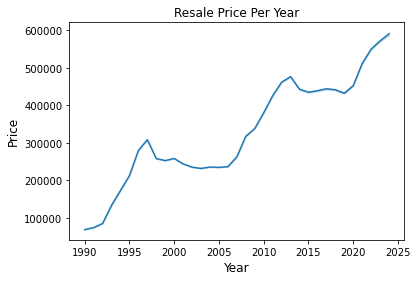

In [17]:
sns.lineplot(data = data, x ='year', y = 'resale_price')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Price',fontsize = 12)
plt.title("Resale Price Per Year")
plt.show()
     


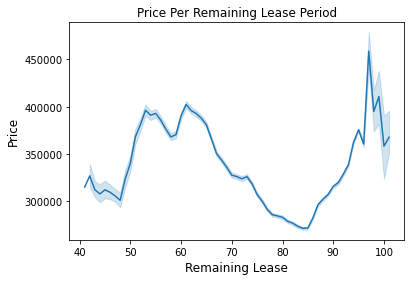

In [18]:

sns.lineplot(data = data, x ='remaining_lease', y = 'resale_price')
plt.xlabel('Remaining Lease', fontsize = 12)
plt.ylabel('Price',fontsize = 12)
plt.title("Price Per Remaining Lease Period")
plt.show()

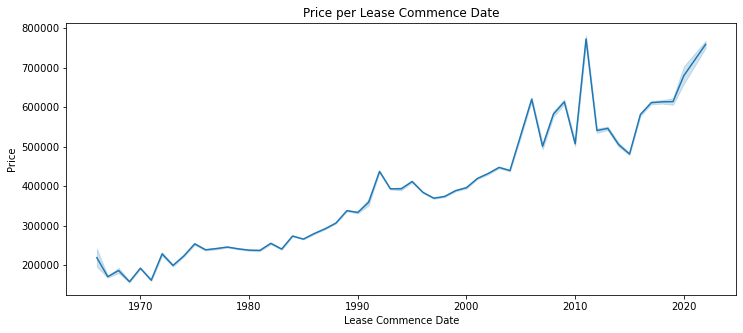

In [19]:
plt.figure(figsize=(12,5))
sns.lineplot(x='lease_commence_date', y='resale_price', data=data)
plt.xlabel('Lease Commence Date')
plt.ylabel('Price')
plt.title('Price per Lease Commence Date')
plt.show()
     

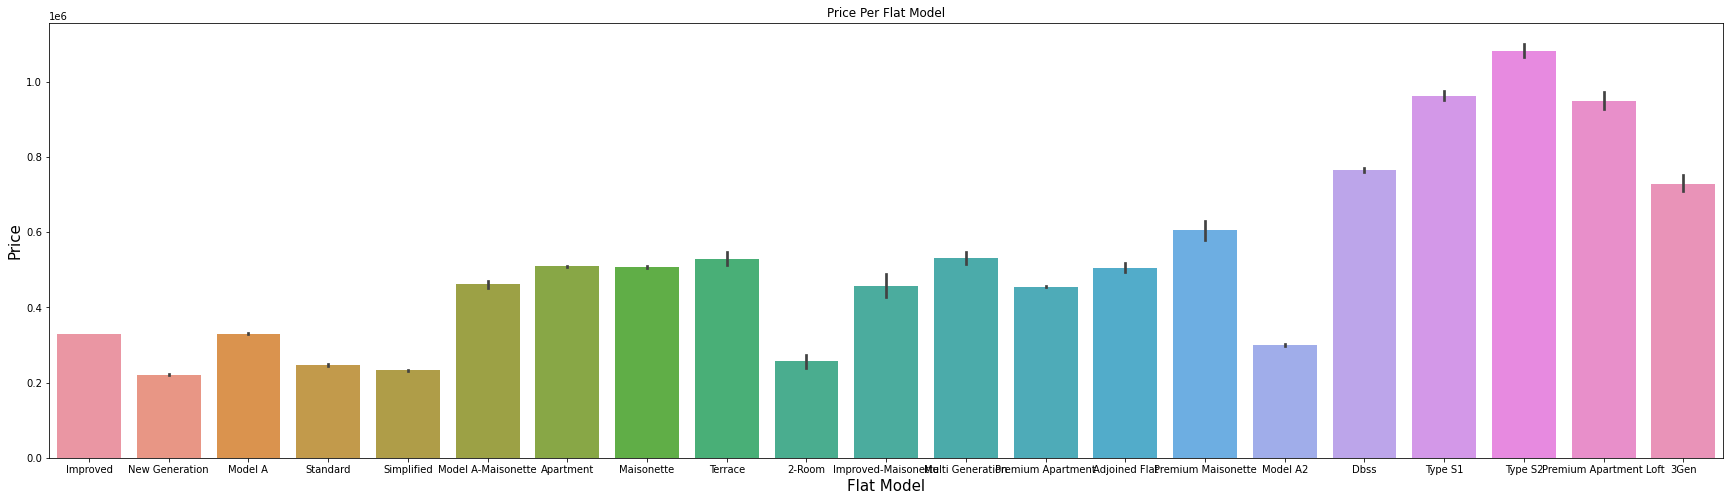

In [20]:
plt.figure(figsize=(30,8))
sns.barplot(x='flat_model',y = 'resale_price', data=data)
plt.xlabel('Flat Model', fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.title("Price Per Flat Model")
plt.show()


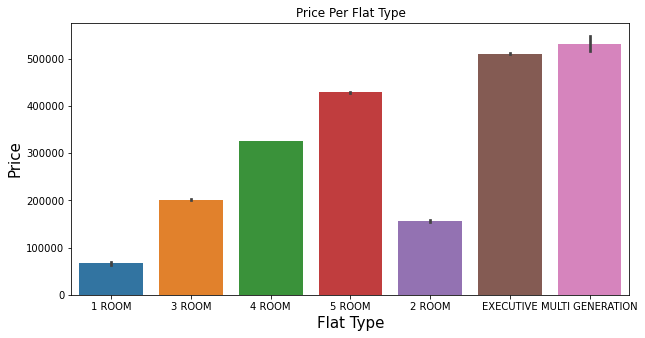

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(data = data, x ='flat_type',y = 'resale_price')
plt.xlabel('Flat Type', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.title('Price Per Flat Type')
plt.show()

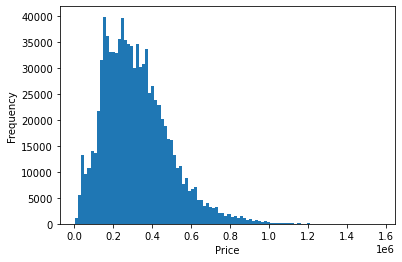

In [22]:
plt.hist(data['resale_price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Calculate the average of the upper and lower bounds and create a new column 'storey_range_avg'
data['storey_range_avg'] = data['storey_range'].apply(lambda x: (int(x.split(' TO ')[0]) + int(x.split(' TO ')[1])) / 2)

# Drop the original 'storey_range' column
data.drop(columns=['storey_range'], inplace=True)

# Rename the 'storey_range_avg' column to 'storey_range'
data.rename(columns={'storey_range_avg': 'storey_range'}, inplace=True)

In [24]:
# Create a mapping from flat_type to integer values
flat_type_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION' : 7
}

# Apply the mapping to the 'flat_type' column
data['flat_type_encoded'] = data['flat_type'].map(flat_type_mapping)

# You can drop the original 'flat_type' column if needed
data.drop(columns=['flat_type'], inplace=True)

# If you want to rename the new column to 'flat_type', you can do so
data.rename(columns={'flat_type_encoded': 'flat_type'}, inplace=True)

In [25]:
data.drop(['street_name','block'],axis=1,inplace=True)

In [26]:
data2=pd.get_dummies(data,columns=['town','flat_model'])

In [27]:
# Train / Test Model

# Define features (X) and target (y)
X = data2.drop("resale_price", axis=1)
y = data2["resale_price"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Initialize the models
linear_reg_model=LinearRegression()
decision_tree_model=DecisionTreeRegressor()
random_forest_model=RandomForestRegressor()

# Train the models on the training data
linear_reg_model.fit(X_train,y_train)
decision_tree_model.fit(X_train,y_train)
random_forest_model.fit(X_train,y_train)

# Predict on the validation set for each model
linear_reg_pred=linear_reg_model.predict(X_val)
decision_tree_pred=decision_tree_model.predict(X_val)
random_forest_pred=random_forest_model.predict(X_val)

# Calculate Regression metrics for each model
linear_reg_mae=mean_absolute_error(y_val,linear_reg_pred)
linear_reg_mse=mean_squared_error(y_val, linear_reg_pred)
linear_reg_rmse=np.sqrt(linear_reg_mse)
linear_reg_r2=r2_score(y_val,linear_reg_pred)

decision_tree_mae=mean_absolute_error(y_val, decision_tree_pred)
decision_tree_mse=mean_squared_error(y_val, decision_tree_pred)
decision_tree_rmse=np.sqrt(decision_tree_mse)
decision_tree_r2=r2_score(y_val, decision_tree_pred)

random_forest_mae = mean_absolute_error(y_val, random_forest_pred)
random_forest_mse = mean_squared_error(y_val, random_forest_pred)
random_forest_rmse = np.sqrt(random_forest_mse)
random_forest_r2 = r2_score(y_val, random_forest_pred)

# Display the results for all three models
print("Linear Regression Results: ")
print(f"Mean Absolute Error: {linear_reg_mae}")
print(f"Mean Squared Error: {linear_reg_mse}")
print(f"Root Mean Squared Error: {linear_reg_rmse}")
print(f"R2 Score: {linear_reg_r2}")
print()

print("Decision Tree Results:")
print(f"Mean Absolute Error: {decision_tree_mae}")
print(f"Mean Squared Error: {decision_tree_mse}")
print(f"Root Mean Squared Error: {decision_tree_rmse}")
print(f"R2 Score: {decision_tree_r2}")
print()

print("Random Forest Results:")
print(f"Mean Absolute Error: {random_forest_mae}")
print(f"Mean Squared Error: {random_forest_mse}")
print(f"Root Mean Squared Error: {random_forest_rmse}")
print(f"R2 Score: {random_forest_r2}")

Linear Regression Results: 
Mean Absolute Error: 52662.07096657599
Mean Squared Error: 4698053795.075763
Root Mean Squared Error: 68542.35037606869
R2 Score: 0.8360067332859014

Decision Tree Results:
Mean Absolute Error: 21050.348864416253
Mean Squared Error: 1026470082.7025024
Root Mean Squared Error: 32038.571795610715
R2 Score: 0.9641693796220229

Random Forest Results:
Mean Absolute Error: 16693.534031384814
Mean Squared Error: 613826598.0251303
Root Mean Squared Error: 24775.524172560512
R2 Score: 0.9785733766795832


In [29]:
# Create and train the Random Forest model using your training data
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)


In [31]:
# Define a function to take user input
def get_user_input():
    user_input = {}

    user_input['month'] = int(input("Enter the month: "))
    user_input['floor_area_sqm'] = float(input("Enter the floor area in square meters: "))
    user_input['lease_commence_date'] = int(input("Enter the lease commencement year: "))
    user_input['remaining_lease'] = None
    user_input['year'] = int(input("Enter the year: "))
    user_input['remaining_lease'] = user_input['lease_commence_date'] + 99 - user_input['year']

    # Calculate remaining lease based on user input
    #user_input['remaining_lease'] = user_input['lease_commence_date'] + 99 - user_input['year']

    user_input['storey_range'] = float(input("Enter the storey range: "))
    user_input['flat_type'] = int(input("Enter the flat type (e.g., 1, 2, 3, etc.): "))

    town = input("Enter the town (e.g., 'BEDOK', 'TAMPINES', etc.): ")
    flat_model = input("Enter the flat model (e.g., 'Improved', 'New Generation', etc.): ")

    # Set all other 'town' columns to 0
    all_town_columns = [
        'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
        'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
        'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST', 'town_JURONG WEST',
        'town_KALLANG/WHAMPOA', 'town_LIM CHU KANG', 'town_MARINE PARADE', 'town_PASIR RIS',
        'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
        'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN'
    ]

    for town_column in all_town_columns:
        if town_column != f'town_{town}':
            user_input[town_column] = 0
        else:
            user_input[f'town_{town}'] = 1

    # Set all other 'flat_model' columns to 0
    all_flat_model_columns = [
        'flat_model_2-Room', 'flat_model_3Gen', 'flat_model_Adjoined Flat', 'flat_model_Apartment',
        'flat_model_Dbss', 'flat_model_Improved', 'flat_model_Improved-Maisonette',
        'flat_model_Maisonette', 'flat_model_Model A', 'flat_model_Model A-Maisonette',
        'flat_model_Model A2', 'flat_model_Multi Generation', 'flat_model_New Generation',
        'flat_model_Premium Apartment', 'flat_model_Premium Apartment Loft',
        'flat_model_Premium Maisonette', 'flat_model_Simplified', 'flat_model_Standard',
        'flat_model_Terrace', 'flat_model_Type S1', 'flat_model_Type S2'
    ]

    for flat_model_column in all_flat_model_columns:
        if flat_model_column != f'flat_model_{flat_model}':
            user_input[flat_model_column] = 0
        else:
            user_input[f'flat_model_{flat_model}'] = 1

    return user_input

In [33]:
# Get user input
user_input_data = get_user_input()

# Create a DataFrame from the user input
user_input_df = pd.DataFrame([user_input_data])

# Use the model to make predictions
predicted_prices = random_forest_model.predict(user_input_df)

# Print the predicted resale price
print("Predicted Resale Price:", predicted_prices[0])


Enter the month: 02
Enter the floor area in square meters: 163
Enter the lease commencement year: 2023
Enter the year: 2019
Enter the storey range: 4
Enter the flat type (e.g., 1, 2, 3, etc.): 3
Enter the town (e.g., 'BEDOK', 'TAMPINES', etc.): BISHAN
Enter the flat model (e.g., 'Improved', 'New Generation', etc.): Improved
Predicted Resale Price: 517470.7485714286


In [34]:
%%writefile app.py

import pickle
import pandas as pd
import numpy as np
import streamlit as st

def load_model(model_file):
    with open(model_file, 'rb') as file:
        loaded_model = pickle.load(file)
    return loaded_model

def convert_storey_range(storey_range):
    return (int(storey_range.split(' TO ')[0]) + int(storey_range.split(' TO ')[1])) / 2

flat_type_mapping = {'1 ROOM': 1,'2 ROOM': 2,'3 ROOM': 3,'4 ROOM': 4,'5 ROOM': 5,'EXECUTIVE': 6,'MULTI GENERATION': 7}

month_mapping = {
  'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12
}

storey = ['01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10', '07 TO 09',
          '10 TO 12', '11 TO 15', '13 TO 15', '16 TO 18', '16 TO 20',
          '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30',
          '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40',
          '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51']


all_towns = ['ANG MO KIO','BEDOK','BISHAN','BUKIT BATOK','BUKIT MERAH',
            'BUKIT PANJANG','BUKIT TIMAH','CENTRAL AREA','CHOA CHU KANG',
            'CLEMENTI','GEYLANG','HOUGANG','JURONG EAST','JURONG WEST',
            'KALLANG/WHAMPOA','LIM CHU KANG','MARINE PARADE','PASIR RIS','PUNGGOL',
            'QUEENSTOWN','SEMBAWANG','SENGKANG','SERANGOON','TAMPINES',
            'TOA PAYOH','WOODLANDS','YISHUN']


all_flat_model = ['2-Room','3Gen','Adjoined Flat','Apartment','Dbss',
                  'Improved','Improved-Maisonette','Maisonette','Model A','Model A-Maisonette',
                  'Model A2','Multi Generation','New Generation','Premium Apartment','Premium Apartment Loft',
                  'Premium Maisonette','Simplified','Standard','Terrace','Type S1','Type S2']

def get_user_input():
    user_input = {}

    st.write("#### Enter the Details:")

    # Display "Month" as a dropdown with month names
    month = st.selectbox("Month", list(month_mapping.keys()))
    user_input['month'] = month_mapping[month]
    year = st.number_input("Year (YYYY)", min_value=1990, max_value=2023)

    user_input['floor_area_sqm'] = st.number_input("Floor Area (sqm)")
    user_input['lease_commence_date'] = st.number_input("Lease Commencement Year (YYYY)", min_value=1966, max_value=2023)

    user_input['remaining_lease'] = None
    user_input['year'] = year

    user_input['remaining_lease'] = user_input['lease_commence_date'] + 99 - user_input['year']

    # Display "storey_range" as a select box with input as "01 TO 03"
    storey_range = st.selectbox("Storey Range", storey)

    # Convert storey range to the average of the range
    user_input['storey_range'] = convert_storey_range(storey_range)

    # Display "flat_type" as a dropdown with user-friendly names
    flat_type = st.selectbox("Flat Type", list(flat_type_mapping.keys()))
    user_input['flat_type'] = flat_type_mapping[flat_type]

    town = st.selectbox("Town", all_towns)
    all_town_columns = []
    for i in all_towns:
        all_town_columns.append(f'town_{i}')

    for town_column in all_town_columns:
        if town_column != f'town_{town}':
            user_input[town_column] = 0
        else:
            user_input[f'town_{town}'] = 1


    flat_model = st.selectbox("Flat Model", all_flat_model)
    all_flat_model_columns = []
    for i in all_flat_model:
        all_flat_model_columns.append(f'flat_model_{i}')

    for flat_model_column in all_flat_model_columns:
        if flat_model_column != f'flat_model_{flat_model}':
            user_input[flat_model_column] = 0
        else:
            user_input[f'flat_model_{flat_model}'] = 1

    return user_input

def main():
    st.set_page_config(page_title="Singapore Resale Flat Price Prediction - Made by: Pranit Akhade",layout="wide",initial_sidebar_state="auto")

    st.title("Singapore Resale Flat Price Prediction")

    user_input_data = get_user_input()

    if st.button("Predict"):
        user_input_df = pd.DataFrame([user_input_data])
        loaded_model = load_model('random_forest_model.pkl')
        predicted_price = loaded_model.predict(user_input_df)
        st.write(f"### Predicted Resale Price: S$ {predicted_price[0]:.2f}")

if __name__ == "__main__":
    main()


Overwriting app.py


In [ ]:


!streamlit run app.py
     